In [1]:
import tensorflow as tf
import pandas as pd
tf.__version__

'2.13.0'

In [2]:
# Generate a dataframe based on the dataset
df = pd.read_csv('Bias_correction_ucl.csv')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [3]:
# Remove dates from the dataframe
df.drop('Date', inplace=True, axis=1)
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


Text(0, 0.5, 'Frequency')

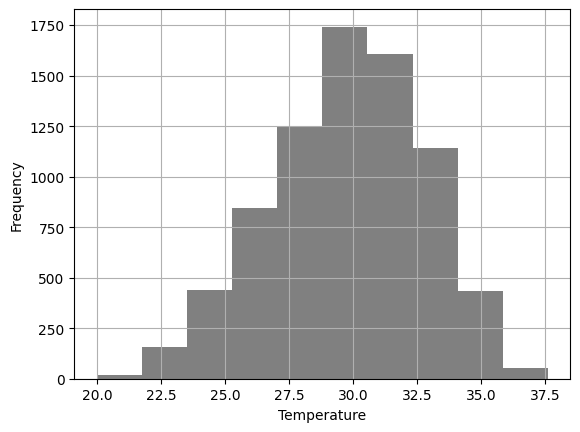

In [5]:
# Plot a histogram of temperature distribution within the data
ax = df['Present_Tmax'].hist(color='gray')
ax.set_xlabel("Temperature")
ax.set_ylabel("Frequency")

In [6]:
from sklearn.preprocessing import StandardScaler
# Scale the data to have a standard deviation of 1, and mean of 0
scaler = StandardScaler()
df2 = scaler.fit_transform(df)
df2 = pd.DataFrame(df2, columns=df.columns)
df2

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,-1.664101,-0.359691,-0.756092,0.102018,0.381220,-0.522343,-0.215612,-0.127759,0.205963,-0.513740,...,-0.275149,-0.239470,-0.223364,1.189286,-0.005000,2.772243,1.115004,1.517935,-0.375626,-0.696383
1,-1.525426,0.717821,-0.673236,-0.306534,0.310075,0.080503,0.222762,-0.643856,-0.313314,-0.545897,...,-0.275149,-0.239470,-0.223364,1.189286,0.511177,-0.315157,-0.542158,1.229950,0.071972,-0.173760
2,-1.386750,0.616804,0.031047,-0.550133,-0.612000,0.162146,0.449022,-0.439462,-1.243225,-0.607490,...,-0.275149,-0.239470,-0.223364,0.653021,0.838510,-0.526218,-0.723133,1.216534,0.263799,0.389065
3,-1.248075,0.751493,0.072475,0.100934,1.127560,0.030941,-0.079487,-0.663016,0.095532,-0.580709,...,-0.275149,-0.239470,-0.223364,1.991696,0.385280,-0.297588,0.932424,1.201176,0.455627,0.549872
4,-1.109400,0.549460,-0.548950,-0.039904,0.247558,-0.169499,-0.011133,-0.624112,1.347841,-0.828251,...,-0.275149,-0.239470,-0.223364,0.118743,1.807917,-0.494322,-0.548433,1.207205,0.295771,-0.173760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,1.386750,-2.177992,-2.537513,-2.046618,-1.321685,-1.106673,-2.019837,-0.434565,0.283241,-1.290729,...,-0.275149,-0.239470,-0.223364,-0.149390,-1.263971,-0.852681,-0.803915,-2.093040,-0.631396,-1.942639
7748,1.525426,-2.177992,-2.288943,-2.230749,-1.540676,-0.883357,-2.037814,-0.254182,-0.452543,-1.268477,...,-0.275149,-0.239470,-0.223364,-0.417522,-1.037356,-0.821213,-0.755095,-2.104553,-0.535483,-1.661226
7749,1.664101,-2.211664,-2.413228,-2.306266,-1.547800,-0.568012,-2.127595,0.087645,-1.583680,-1.218638,...,-0.275149,-0.239470,-0.223364,-0.417522,-0.269384,-0.779043,-0.719338,-2.074325,-0.791253,-2.224051
7750,NaN,-3.289176,-4.940359,-2.520237,-4.093496,-4.068034,-3.939947,-1.930351,-2.256503,-1.405170,...,-0.275149,-0.239470,-0.223364,-1.758184,-2.082302,-0.911963,-0.845455,-2.358212,-4.116266,-4.676360


Text(0, 0.5, 'Frequency')

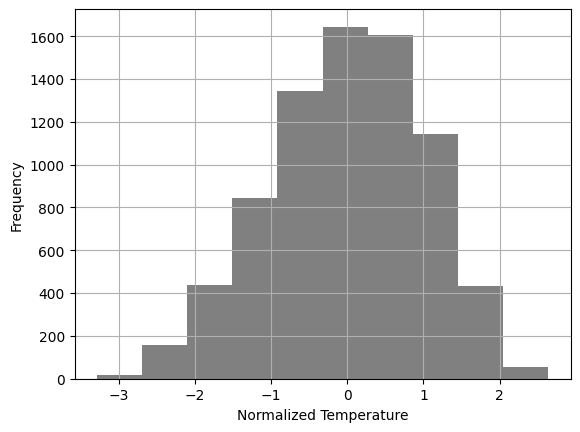

In [7]:
# Plotting the scaled data
ax = df2['Present_Tmax'].hist(color='gray')
ax.set_xlabel("Normalized Temperature")
ax.set_ylabel("Frequency")